In [1119]:
import pandas as pd
import numpy as np

from ydata_profiling import ProfileReport

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import warnings
# Ignore the specific future warning
warnings.filterwarnings("ignore", category=FutureWarning)

In [1120]:
df = pd.read_csv("train.csv", index_col=False)

In [1121]:
profile = ProfileReport(df, title="Profiling Report - Train")
profile.to_file("report_titanic_train_before_analysis.html")

profile = ProfileReport(df_test, title="Profiling Report - Test")
profile.to_file("report_titanic_test_before_analysis.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [1122]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [1123]:
df_test = pd.read_csv("test.csv")

In [1124]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1125]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [1126]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

The not numeric features were found in the dataframe: Name, Sex, Ticket, Cabin, Embarked. Initially, they will all be removed.

In [1127]:
# removal not numeric features 
df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_test = df_test.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

Age was mean for the null fields

In [1128]:
# Calculate the mean of the 'Age' column
mean_age = df['Age'].mean()

# Fill the missing values in the 'Age' column with the mean
df['Age'].fillna(mean_age, inplace=True)

In [1129]:
# Calculate the mean of the 'Age' column
mean_age = df_test['Age'].mean()

# Fill the missing values in the 'Age' column with the mean
df_test['Age'].fillna(mean_age, inplace=True)

In [1130]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
dtypes: float64(2), int64(4

In [1131]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()
print(null_values)

null_values = df_test.isnull().sum()
print(null_values)

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64
PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
dtype: int64


In [1132]:
num_null_entries = df['Fare'].isnull().sum()
print("Number of null entries in 'Fare':", num_null_entries)

num_null_entries = df_test['Fare'].isnull().sum()
print("Number of null entries in 'Fare':", num_null_entries)

mean_fare = df_test['Fare'].mean()
print(mean_fare)
df_test['Fare'] = df_test['Fare'].fillna(mean_fare)

Number of null entries in 'Fare': 0
Number of null entries in 'Fare': 1
35.6271884892086


In [1133]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()
print(null_values)

null_values = df_test.isnull().sum()
print(null_values)

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64
PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


## DecisionTreeClassifier 

In [1134]:
X = df.drop(['PassengerId', 'Survived'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Decision Tree classifier
clf_DC = DecisionTreeClassifier(random_state=42)

# Train the model using the training set
clf_DC.fit(X_train, y_train)

# Make predictions on the test set
y_pred_DC = clf_DC.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred_DC)

print("DecisionTreeClassifier - Model accuracy: {:.2f}%".format(accuracy * 100))

DecisionTreeClassifier - Model accuracy: 64.25%


## KNeighborsClassifier:  n_neighbors=3

In [1135]:
neigh = KNeighborsClassifier(n_neighbors=3)
clf_neigh = neigh.fit(X, y)

# Make predictions on the test set
y_pred_neigh = clf_neigh.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred_neigh)
print("KNeighborsClassifier - Model accuracy: {:.2f}%".format(accuracy * 100))

KNeighborsClassifier - Model accuracy: 83.24%


## KNeighborsClassifier:  n_neighbors=5

In [1136]:
neigh = KNeighborsClassifier(n_neighbors=5)
clf_neigh = neigh.fit(X, y)

# Make predictions on the test set
y_pred_neigh = clf_neigh.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred_neigh)
print("KNeighborsClassifier - Model accuracy: {:.2f}%".format(accuracy * 100))

KNeighborsClassifier - Model accuracy: 82.12%


## KNeighborsClassifier:  n_neighbors=7

In [1137]:
neigh = KNeighborsClassifier(n_neighbors=7)
clf_neigh = neigh.fit(X, y)

# Make predictions on the test set
y_pred_neigh = clf_neigh.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred_neigh)
print("KNeighborsClassifier - Model accuracy: {:.2f}%".format(accuracy * 100))

KNeighborsClassifier - Model accuracy: 77.09%


## LogisticRegression

In [1138]:
model = LogisticRegression(max_iter=1000, random_state=42)
model = model.fit(X, y)
y_pred_LR = model.predict(X_test)
accuracy = model.score(X, y)
print("LogisticRegression - Model accuracy: {:.2f}%".format(accuracy * 100))

LogisticRegression - Model accuracy: 70.48%


In [1139]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [1140]:
# removal not numeric features 
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [1141]:
num_null_entries = df['Fare'].isnull().sum()
print("Number of null entries in 'Fare':", num_null_entries)

num_null_entries = df_test['Fare'].isnull().sum()
print("Number of null entries in 'Fare':", num_null_entries)

mean_fare = df_test['Fare'].mean()
print(mean_fare)
df_test['Fare'] = df_test['Fare'].fillna(mean_fare)

Number of null entries in 'Fare': 0
Number of null entries in 'Fare': 1
35.6271884892086


In [1142]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [1143]:
num_null_entries = df['Embarked'].isnull().sum()
print("Number of null entries in 'Embarked':", num_null_entries)

value_counts = df['Embarked'].value_counts()
print(value_counts)

mode_embarked = df['Embarked'].mode()[0]
print("Mode of Embarked:", mode_embarked)

df.loc[df.Embarked.isnull(), 'Embarked'] = mode_embarked

Number of null entries in 'Embarked': 2
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Mode of Embarked: S


## Create Embarked column

In [1144]:
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

In [1145]:
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

## Create sex_male, and sex_female column

In [1146]:
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')

In [1147]:
df_test = pd.get_dummies(df_test, columns=['Sex'], prefix='Sex')

## Create age groups column

In [1148]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 17, 64, float('inf')], labels=[1, 2, 3])

# Aplicar one-hot encoding na coluna "Age_Group"
df = pd.get_dummies(df, columns=['Age_Group'])

In [1149]:
# Create age groups column
df_test['Age_Group'] = pd.cut(df_test['Age'], bins=[0, 17, 64, float('inf')], labels=[1, 2, 3])

# Aplicar one-hot encoding na coluna "Age_Group"
df_test = pd.get_dummies(df_test, columns=['Age_Group'])

In [1150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked_C   891 non-null    uint8  
 8   Embarked_Q   891 non-null    uint8  
 9   Embarked_S   891 non-null    uint8  
 10  Sex_female   891 non-null    uint8  
 11  Sex_male     891 non-null    uint8  
 12  Age_Group_1  891 non-null    uint8  
 13  Age_Group_2  891 non-null    uint8  
 14  Age_Group_3  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 55.8 KB


In [1151]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          332 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Embarked_C   418 non-null    uint8  
 7   Embarked_Q   418 non-null    uint8  
 8   Embarked_S   418 non-null    uint8  
 9   Sex_female   418 non-null    uint8  
 10  Sex_male     418 non-null    uint8  
 11  Age_Group_1  418 non-null    uint8  
 12  Age_Group_2  418 non-null    uint8  
 13  Age_Group_3  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(8)
memory usage: 23.0 KB


In [1152]:
# Apply one-hot encoding on column "Age_Group"
df = df.sort_values('Pclass', ascending=True)

df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_Group_1,Age_Group_2,Age_Group_3
445,446,1,1,4.0,0,2,81.8583,0,0,1,0,1,1,0,0
310,311,1,1,24.0,0,0,83.1583,1,0,0,1,0,0,1,0
309,310,1,1,30.0,0,0,56.9292,1,0,0,1,0,0,1,0
307,308,1,1,17.0,1,0,108.9000,1,0,0,1,0,1,0,0
306,307,1,1,NaN,0,0,110.8833,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,0,3,19.0,0,0,7.7750,0,0,1,0,1,0,1,0
381,382,1,3,1.0,0,2,15.7417,1,0,0,1,0,1,0,0
382,383,0,3,32.0,0,0,7.9250,0,0,1,0,1,0,1,0
371,372,0,3,18.0,1,0,6.4958,0,0,1,0,1,0,1,0


In [1153]:
# Apply one-hot encoding on column "Age_Group"
df_test = df_test.sort_values('Pclass', ascending=True)

df_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_Group_1,Age_Group_2,Age_Group_3
208,1100,1,33.0,0,0,27.7208,1,0,0,1,0,0,1,0
350,1242,1,45.0,0,1,63.3583,1,0,0,1,0,0,1,0
122,1014,1,35.0,1,0,57.7500,1,0,0,1,0,0,1,0
343,1235,1,58.0,0,1,512.3292,1,0,0,1,0,0,1,0
131,1023,1,53.0,0,0,28.5000,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1057,3,26.0,1,1,22.0250,0,0,1,1,0,0,1,0
163,1055,3,NaN,0,0,7.0000,0,0,1,0,1,0,0,0
161,1053,3,7.0,1,1,15.2458,1,0,0,0,1,1,0,0
199,1091,3,NaN,0,0,8.1125,0,0,1,1,0,0,0,0


In [1154]:
num_null_age = df['Age'].isnull().sum()
print("df -> Number of people who are aged equal to null':", num_null_age)

df -> Number of people who are aged equal to null': 177


In [1155]:
num_null_age = df_test['Age'].isnull().sum()
print("df_test -> Number of people who are aged equal to null':", num_null_age)

df_test -> Number of people who are aged equal to null': 86


## df -> Number of men who are aged equal to null

In [1156]:
condition = (df['Sex_male'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of men who are aged equal to null:", num_nan_age)
print("")

condition = (df['Pclass'] == 1) & (df['Survived'] == 1) & (df['Sex_male'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of survivor men 1 class who are aged equal to null:", num_nan_age)

condition = (df['Pclass'] == 2) & (df['Survived'] == 1) & (df['Sex_male'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of survivor men 2 class who are aged equal to null:", num_nan_age)

condition = (df['Pclass'] == 3) & (df['Survived'] == 1) & (df['Sex_male'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of survivor men 3 class who are aged equal to null:", num_nan_age)

condition = (df['Survived'] == 1) & (df['Sex_male'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of survivor men who are aged equal to null:", num_nan_age)

print("")

condition = (df['Pclass'] == 1) & (df['Survived'] == 0) & (df['Sex_male'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of non survivor men 1 class who are aged equal to null:", num_nan_age)

condition = (df['Pclass'] == 2) & (df['Survived'] == 0) & (df['Sex_male'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of non survivor men 2 class who are aged equal to null:", num_nan_age)

condition = (df['Pclass'] == 3) & (df['Survived'] == 0) & (df['Sex_male'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of non survivor men 3 class who are aged equal to null:", num_nan_age)

condition = (df['Survived'] == 0) & (df['Sex_male'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of non-survivor men who are aged equal to null:", num_nan_age)


Number of men who are aged equal to null: 124

Number of survivor men 1 class who are aged equal to null: 5
Number of survivor men 2 class who are aged equal to null: 2
Number of survivor men 3 class who are aged equal to null: 9
Number of survivor men who are aged equal to null: 16

Number of non survivor men 1 class who are aged equal to null: 16
Number of non survivor men 2 class who are aged equal to null: 7
Number of non survivor men 3 class who are aged equal to null: 85
Number of non-survivor men who are aged equal to null: 108


## df -> Number of women who are aged equal to null

In [1157]:
condition = (df['Sex_female'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of women who are aged equal to null:", num_nan_age)
print("")

condition = (df['Pclass'] == 1) & (df['Survived'] == 1) & (df['Sex_female'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of survivor women 1 class who are aged equal to null:", num_nan_age)

condition = (df['Pclass'] == 2) & (df['Survived'] == 1) & (df['Sex_female'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of survivor women 2 class who are aged equal to null:", num_nan_age)

condition = (df['Pclass'] == 3) & (df['Survived'] == 1) & (df['Sex_female'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of survivor women 3 class who are aged equal to null:", num_nan_age)

condition = (df['Survived'] == 1) & (df['Sex_female'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of survivor women who are aged equal to null:", num_nan_age)

print("")

condition = (df['Pclass'] == 1) & (df['Survived'] == 0) & (df['Sex_female'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of non survivor women 1 class who are aged equal to null:", num_nan_age)

condition = (df['Pclass'] == 2) & (df['Survived'] == 0) & (df['Sex_female'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of non survivor women 2 class who are aged equal to null:", num_nan_age)

condition = (df['Pclass'] == 3) & (df['Survived'] == 0) & (df['Sex_female'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of non survivor women 3 class who are aged equal to null:", num_nan_age)

condition = (df['Survived'] == 0) & (df['Sex_female'] == 1)
num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of non-survivor women who are aged equal to null:", num_nan_age)

Number of women who are aged equal to null: 53

Number of survivor women 1 class who are aged equal to null: 9
Number of survivor women 2 class who are aged equal to null: 2
Number of survivor women 3 class who are aged equal to null: 25
Number of survivor women who are aged equal to null: 36

Number of non survivor women 1 class who are aged equal to null: 0
Number of non survivor women 2 class who are aged equal to null: 0
Number of non survivor women 3 class who are aged equal to null: 17
Number of non-survivor women who are aged equal to null: 17


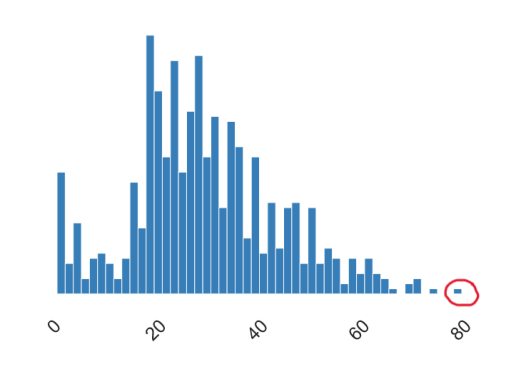

In [1158]:
img = mpimg.imread('report_age.png')
plt.imshow(img)
plt.axis('off')

plt.show()

![Report Age](report_age.jpg)

In [1159]:
above_80 = (df['Age'] >= 80).sum()
print(above_80, "Outlier")

1 Outlier


In [1160]:
df = df.drop(df[df['Age'] >= 80].index)

## df -> Survived=1, Pclass=1, Sex_male=1

In [1161]:
condition = (df['Survived'] == 1) & (df['Pclass'] == 1) & (df['Sex_male'] == 1)

num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of people who are aged equal to null:", num_nan_age)

# Fill in the null values of the "Age" column with the mean
df.loc[condition, 'Age'] = df.loc[condition, 'Age'].fillna(mean_age)

# Calculate the mean age
mean_age = df.loc[condition, 'Age'].mean()
print('Final average age: ', mean_age)

Number of people who are aged equal to null: 5
Final average age:  34.57461254107338


## df -> Survived=0, Pclass=1, Sex_male=1

In [1162]:
condition = (df['Survived'] == 0) & (df['Pclass'] == 1) & (df['Sex_male'] == 1)

num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of people for the specified conditions:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df = df[condition & df['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df['Age'].mean()

# Fill in the null values of the "Age" column with the mean
df.loc[condition, 'Age'] = df.loc[condition, 'Age'].fillna(mean_age)

# Calculate the mean age
mean_age = filtered_df['Age'].mean()
print('Average age: ', mean_age)



Number of people for the specified conditions: 16
Average age:  44.58196721311475


## df -> Survived=1, Pclass=2, Sex_male=1

In [1163]:
condition = (df['Survived'] == 1) & (df['Pclass'] == 2) & (df['Sex_male'] == 1)

num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of people who are aged equal to null:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df = df[condition & df['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df['Age'].mean()

# Fill in the null values of the "Age" column with the mean
df.loc[condition, 'Age'] = df.loc[condition, 'Age'].fillna(mean_age)

# Calculate the mean age
mean_age = filtered_df['Age'].mean()
print('Average age: ', mean_age)



Number of people who are aged equal to null: 2
Average age:  16.022


## df -> Survived=0, Pclass=2, Sex_male=1

In [1164]:
condition = (df['Survived'] == 0) & (df['Pclass'] == 2) & (df['Sex_male'] == 1)

num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of people who are aged equal to null:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df = df[condition & df['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df['Age'].mean()

# Fill in the null values of the "Age" column with the mean
df.loc[condition, 'Age'] = df.loc[condition, 'Age'].fillna(mean_age)

# Calculate the mean age
mean_age = filtered_df['Age'].mean()
print('Average age: ', mean_age)



Number of people who are aged equal to null: 7
Average age:  33.36904761904762


## df -> Survived=1, Pclass=3, Sex_male=1

In [1165]:
condition = (df['Survived'] == 1) & (df['Pclass'] == 3) & (df['Sex_male'] == 1)

num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of people who are aged equal to null:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df = df[condition & df['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df['Age'].mean()

# Fill in the null values of the "Age" column with the mean
df.loc[condition, 'Age'] = df.loc[condition, 'Age'].fillna(mean_age)

# Calculate the mean age
mean_age = filtered_df['Age'].mean()
print('Average age: ', mean_age)



Number of people who are aged equal to null: 9
Average age:  22.27421052631579


##  df -> Survived=0, Pclass=3, Sex_male=1

In [1166]:
condition = (df['Survived'] == 0) & (df['Pclass'] == 3) & (df['Sex_male'] == 1)

num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of people who are aged equal to null:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df = df[condition & df['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df['Age'].mean()

# Fill in the null values of the "Age" column with the mean
df.loc[condition, 'Age'] = df.loc[condition, 'Age'].fillna(mean_age)

# Calculate the mean age
mean_age = filtered_df['Age'].mean()
print('Average age: ', mean_age)



Number of people who are aged equal to null: 85
Average age:  27.25581395348837


## df ->  Survived=1, Sex_male=1

In [1167]:
condition = (df['Age_Group_1'] == 1) & (df['Survived'] == 1) & (df['Sex_male'] == 1)

# Filter the DataFrame with conditions and age not null
filtered_df = df[condition & df['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df['Age'].mean()
print('Average age: ', mean_age)

Average age:  5.072608695652174


In [1168]:
condition = (df['Survived'] == 1) & (df['Sex_male'] == 1)

# Filter the DataFrame with conditions and age not null
filtered_df = df[condition & df['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df['Age'].mean()
print('Average age: ', mean_age)

Average age:  26.30134117170437


## ============================================

## df ->  Survived=1, Pclass=1, Sex_female=1

In [1169]:
condition = (df['Survived'] == 1) & (df['Pclass'] == 1) & (df['Sex_female'] == 1)

num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of people for the specified conditions:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df = df[condition & df['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df['Age'].mean()

# Fill in the null values of the "Age" column with the mean
df.loc[condition, 'Age'] = df.loc[condition, 'Age'].fillna(mean_age)

# Calculate the mean age
mean_age = filtered_df['Age'].mean()
print('Average age: ', mean_age)



Number of people for the specified conditions: 9
Average age:  34.9390243902439


##  df -> Survived=0, Pclass=1, Sex_female=1

In [1170]:
condition = (df['Survived'] == 0) & (df['Pclass'] == 1) & (df['Sex_female'] == 1)

num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of people for the specified conditions:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df = df[condition & df['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df['Age'].mean()

# Fill in the null values of the "Age" column with the mean
df.loc[condition, 'Age'] = df.loc[condition, 'Age'].fillna(mean_age)

# Calculate the mean age
mean_age = filtered_df['Age'].mean()
print('Average age: ', mean_age)



Number of people for the specified conditions: 0
Average age:  25.666666666666668


## df ->  Survived=1, Pclass=2, Sex_female=1

In [1171]:
condition = (df['Survived'] == 1) & (df['Pclass'] == 2) & (df['Sex_female'] == 1)

num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of people for the specified conditions:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df = df[condition & df['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df['Age'].mean()

# Fill in the null values of the "Age" column with the mean
df.loc[condition, 'Age'] = df.loc[condition, 'Age'].fillna(mean_age)

# Calculate the mean age
mean_age = filtered_df['Age'].mean()
print('Average age: ', mean_age)



Number of people for the specified conditions: 2
Average age:  28.080882352941178


##  df -> Survived=0, Pclass=2, Sex_female=1

In [1172]:
condition = (df['Survived'] == 0) & (df['Pclass'] == 2) & (df['Sex_female'] == 1)

num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of people for the specified conditions:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df = df[condition & df['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df['Age'].mean()

# Fill in the null values of the "Age" column with the mean
df.loc[condition, 'Age'] = df.loc[condition, 'Age'].fillna(mean_age)

# Calculate the mean age
mean_age = filtered_df['Age'].mean()
print('Average age: ', mean_age)



Number of people for the specified conditions: 0
Average age:  36.0


## df ->  Survived=1, Pclass=3, Sex_female=1

In [1173]:
condition = (df['Survived'] == 1) & (df['Pclass'] == 3) & (df['Sex_female'] == 1)

num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of people for the specified conditions:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df = df[condition & df['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df['Age'].mean()

# Fill in the null values of the "Age" column with the mean
df.loc[condition, 'Age'] = df.loc[condition, 'Age'].fillna(mean_age)

# Calculate the mean age
mean_age = filtered_df['Age'].mean()
print('Average age: ', mean_age)



Number of people for the specified conditions: 25
Average age:  19.329787234042552


## df ->  Survived=0, Pclass=3, Sex_female=1

In [1174]:
condition = (df['Survived'] == 0) & (df['Pclass'] == 3) & (df['Sex_female'] == 1)

num_nan_age = df[condition]['Age'].isnull().sum()
print("Number of people for the specified conditions:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df = df[condition & df['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df['Age'].mean()

# Fill in the null values of the "Age" column with the mean
df.loc[condition, 'Age'] = df.loc[condition, 'Age'].fillna(mean_age)

# Calculate the mean age
mean_age = filtered_df['Age'].mean()
print('Average age: ', mean_age)


Number of people for the specified conditions: 17
Average age:  23.818181818181817


In [1175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 445 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    int64  
 3   Age          890 non-null    float64
 4   SibSp        890 non-null    int64  
 5   Parch        890 non-null    int64  
 6   Fare         890 non-null    float64
 7   Embarked_C   890 non-null    uint8  
 8   Embarked_Q   890 non-null    uint8  
 9   Embarked_S   890 non-null    uint8  
 10  Sex_female   890 non-null    uint8  
 11  Sex_male     890 non-null    uint8  
 12  Age_Group_1  890 non-null    uint8  
 13  Age_Group_2  890 non-null    uint8  
 14  Age_Group_3  890 non-null    uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 62.6 KB


## df_test -> Number of men who are aged equal to null

In [1176]:
condition = (df_test['Sex_male'] == 1)
num_nan_age = df_test[condition]['Age'].isnull().sum()
print("Number of men who are aged equal to null:", num_nan_age)
print("")

condition = (df_test['Pclass'] == 1) & (df_test['Sex_male'] == 1)
num_nan_age = df_test[condition]['Age'].isnull().sum()
print("Number of men 1 class who are aged equal to null:", num_nan_age)

condition = (df_test['Pclass'] == 2) & (df_test['Sex_male'] == 1)
num_nan_age = df_test[condition]['Age'].isnull().sum()
print("Number of men 2 class who are aged equal to null:", num_nan_age)

condition = (df_test['Pclass'] == 3) & (df_test['Sex_male'] == 1)
num_nan_age = df_test[condition]['Age'].isnull().sum()
print("Number of men 3 class who are aged equal to null:", num_nan_age)

Number of men who are aged equal to null: 61

Number of men 1 class who are aged equal to null: 7
Number of men 2 class who are aged equal to null: 4
Number of men 3 class who are aged equal to null: 50


## df_test -> Number of women who are aged equal to null

In [1177]:
condition = (df_test['Sex_female'] == 1)
num_nan_age = df_test[condition]['Age'].isnull().sum()
print("Number of women who are aged equal to null:", num_nan_age)
print("")

condition = (df_test['Pclass'] == 1) & (df_test['Sex_female'] == 1)
num_nan_age = df_test[condition]['Age'].isnull().sum()
print("Number of survivor women 1 class who are aged equal to null:", num_nan_age)

condition = (df_test['Pclass'] == 2) & (df_test['Sex_female'] == 1)
num_nan_age = df_test[condition]['Age'].isnull().sum()
print("Number of survivor women 2 class who are aged equal to null:", num_nan_age)

condition = (df_test['Pclass'] == 3) & (df_test['Sex_female'] == 1)
num_nan_age = df_test[condition]['Age'].isnull().sum()
print("Number of survivor women 3 class who are aged equal to null:", num_nan_age)

Number of women who are aged equal to null: 25

Number of survivor women 1 class who are aged equal to null: 2
Number of survivor women 2 class who are aged equal to null: 1
Number of survivor women 3 class who are aged equal to null: 22


In [1178]:
display(df_test)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_Group_1,Age_Group_2,Age_Group_3
208,1100,1,33.0,0,0,27.7208,1,0,0,1,0,0,1,0
350,1242,1,45.0,0,1,63.3583,1,0,0,1,0,0,1,0
122,1014,1,35.0,1,0,57.7500,1,0,0,1,0,0,1,0
343,1235,1,58.0,0,1,512.3292,1,0,0,1,0,0,1,0
131,1023,1,53.0,0,0,28.5000,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1057,3,26.0,1,1,22.0250,0,0,1,1,0,0,1,0
163,1055,3,NaN,0,0,7.0000,0,0,1,0,1,0,0,0
161,1053,3,7.0,1,1,15.2458,1,0,0,0,1,1,0,0
199,1091,3,NaN,0,0,8.1125,0,0,1,1,0,0,0,0


## df_test -> Pclass=1, Sex_male=1, Age_Group_1=1

In [1179]:
filtered_data = df_test[(df_test['Pclass'] == 1) & (df_test['Sex_male'] == 1)]
selected_columns = ['Pclass', 'Sex_male', 'Age_Group_1', 'Age_Group_2', 'Age_Group_3', 'Age']
filtered_data = filtered_data[selected_columns].sort_values(by='Age')
print(filtered_data)

     Pclass  Sex_male  Age_Group_1  Age_Group_2  Age_Group_3   Age
196       1         1            1            0            0   6.0
64        1         1            1            0            0  13.0
403       1         1            1            0            0  17.0
23        1         1            0            1            0  21.0
390       1         1            0            1            0  23.0
287       1         1            0            1            0  24.0
50        1         1            0            1            0  24.0
94        1         1            0            1            0  25.0
252       1         1            0            1            0  27.0
73        1         1            0            1            0  28.5
34        1         1            0            1            0  30.0
306       1         1            0            1            0  30.0
298       1         1            0            1            0  30.0
335       1         1            0            1            0  

## Pclass=1, Sex_male=1

In [1180]:
# df_test -> Pclass=1, Sex_male=1
count = df_test[(df_test['Pclass'] == 1) & (df_test['Sex_male'] == 1) & (df_test['Age'].isnull())].shape[0]
print("Number of Pclass=1 men without registered age:", count)

Number of Pclass=1 men without registered age: 7


In [1181]:
# df_test -> Pclass=1, Sex_male=1, Age_Group_1=1
condition = (df_test['Pclass'] == 1) & (df_test['Sex_male'] == 1) & (df_test['Age_Group_1'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=1, Sex_male=1, Age_Group_1=1: ', mean_age)


Number of people for the specified conditions: 3
Average age Pclass=1, Sex_male=1, Age_Group_1=1:  12.0


In [1182]:
# df_test -> Pclass=1, Sex_male=1, Age_Group_2=1
condition = (df_test['Pclass'] == 1) & (df_test['Sex_male'] == 1) & (df_test['Age_Group_2'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=1, Sex_male=1, Age_Group_2=1: ', mean_age)


Number of people for the specified conditions: 46
Average age Pclass=1, Sex_male=1, Age_Group_2=1:  41.80434782608695


In [1183]:
# df_test -> Pclass=1, Sex_male=1, Age_Group_3=1
condition = (df_test['Pclass'] == 1) & (df_test['Sex_male'] == 1) & (df_test['Age_Group_1'] == 3)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=1, Sex_male=1, Age_Group_3=1: ', mean_age)

Number of people for the specified conditions: 0
Average age Pclass=1, Sex_male=1, Age_Group_3=1:  nan


In [1184]:
# df_test -> Pclass=1, Sex_male=1
condition = (df_test['Pclass'] == 1) & (df_test['Sex_male'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=1, Sex_male=1: ', mean_age)


Number of people for the specified conditions: 50
Average age Pclass=1, Sex_male=1:  40.52


In [1185]:
# df_test -> Pclass=1, Sex_male=1, no Age information
condition = (df_test['Pclass'] == 1) & (df_test['Sex_male'] == 1)
num_nan_age = df_test[condition]['Age'].isnull().sum()
print("Number of people for the specified conditions:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age_to_fill = filtered_df_test['Age'].mean()
print('Average age to fill in the empty age fields: ', mean_age_to_fill)

#Fill in the null values of the "Age" column with the mean
df_test.loc[condition, 'Age'] = df_test.loc[condition, 'Age'].fillna(mean_age_to_fill)


Number of people for the specified conditions: 7
Average age to fill in the empty age fields:  40.52


## Pclass=2, Sex_male=1

In [1186]:
# df_test -> Pclass=2, Sex_male=1
count = df_test[(df_test['Pclass'] == 2) & (df_test['Sex_male'] == 1) & (df_test['Age'].isnull())].shape[0]
print("Number of Pclass=2 men without registered age:", count)

Number of Pclass=2 men without registered age: 4


In [1187]:
# df_test -> Pclass=2, Sex_male=1, Age_Group_1=1
condition = (df_test['Pclass'] == 2) & (df_test['Sex_male'] == 1) & (df_test['Age_Group_1'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=2, Sex_male=1, Age_Group_1=1: ', mean_age)


Number of people for the specified conditions: 4
Average age Pclass=2, Sex_male=1, Age_Group_1=1:  10.25


In [1188]:
# df_test -> Pclass=2, Sex_male=1, Age_Group_2=1
condition = (df_test['Pclass'] == 2) & (df_test['Sex_male'] == 1) & (df_test['Age_Group_2'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=2, Sex_male=1, Age_Group_2=1: ', mean_age)


Number of people for the specified conditions: 55
Average age Pclass=2, Sex_male=1, Age_Group_2=1:  32.445454545454545


In [1189]:
# df_test -> Pclass=2, Sex_male=1, Age_Group_3=1
condition = (df_test['Pclass'] == 2) & (df_test['Sex_male'] == 1) & (df_test['Age_Group_1'] == 3)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=2, Sex_male=1, Age_Group_3=1: ', mean_age)

Number of people for the specified conditions: 0
Average age Pclass=2, Sex_male=1, Age_Group_3=1:  nan


In [1190]:
# df_test -> Pclass=2, Sex_male=1
condition = (df_test['Pclass'] == 2) & (df_test['Sex_male'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=2, Sex_male=1: ', mean_age)

Number of people for the specified conditions: 59
Average age Pclass=2, Sex_male=1:  30.940677966101696


In [1191]:
# df_test -> Pclass=2, Sex_male=1, no Age information
condition = (df_test['Pclass'] == 2) & (df_test['Sex_male'] == 1)
num_nan_age = df_test[condition]['Age'].isnull().sum()
print("Number of people for the specified conditions:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age to fill in the empty age fields: ', mean_age)

#Fill in the null values of the "Age" column with the mean
df_test.loc[condition, 'Age'] = df_test.loc[condition, 'Age'].fillna(mean_age)


Number of people for the specified conditions: 4
Average age to fill in the empty age fields:  30.940677966101696


In [1192]:
# df_test -> Pclass=2, Sex_male=1, new average age
condition = (df_test['Pclass'] == 2) & (df_test['Sex_male'] == 1)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age']]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('New Average age: ', mean_age)

New Average age:  30.940677966101696


In [1193]:
# df_test -> Pclass=2, Sex_male=1
condition = (df_test['Pclass'] == 2) & (df_test['Sex_male'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('New average age Pclass=2, Sex_male=1: ', mean_age)

Number of people for the specified conditions: 63
New average age Pclass=2, Sex_male=1:  30.940677966101696


## Pclass=3, Sex_male=1

In [1194]:
# df_test -> Pclass=3, Sex_male=1
count = df_test[(df_test['Pclass'] == 3) & (df_test['Sex_male'] == 1) & (df_test['Age'].isnull())].shape[0]
print("Number of Pclass=3 class men without registered age:", count)

Number of Pclass=3 class men without registered age: 50


In [1195]:
# df_test -> Pclass=3, Sex_male=1, Age_Group_1=1
condition = (df_test['Pclass'] == 3) & (df_test['Sex_male'] == 1) & (df_test['Age_Group_1'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=3, Sex_male=1, Age_Group_1=1: ', mean_age)


Number of people for the specified conditions: 17
Average age Pclass=3, Sex_male=1, Age_Group_1=1:  9.524117647058823


In [1196]:
# df_test -> Pclass=3, Sex_male=1, Age_Group_2=1
condition = (df_test['Pclass'] == 3) & (df_test['Sex_male'] == 1) & (df_test['Age_Group_2'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=3, Sex_male=1, Age_Group_2=1: ', mean_age)


Number of people for the specified conditions: 79
Average age Pclass=3, Sex_male=1, Age_Group_2=1:  27.753164556962027


In [1197]:
# df_test -> Pclass=3, Sex_male=1, Age_Group_3=1
condition = (df_test['Pclass'] == 3) & (df_test['Sex_male'] == 1) & (df_test['Age_Group_1'] == 3)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=3, Sex_male=1, Age_Group_3=1: ', mean_age)

Number of people for the specified conditions: 0
Average age Pclass=3, Sex_male=1, Age_Group_3=1:  nan


In [1198]:
# df_test -> Pclass=3, Sex_male=1
condition = (df_test['Pclass'] == 3) & (df_test['Sex_male'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=3, Sex_male=1: ', mean_age)


Number of people for the specified conditions: 96
Average age Pclass=3, Sex_male=1:  24.525104166666665


In [1199]:
# df_test -> Pclass=3, Sex_male=1, no Age information
condition = (df_test['Pclass'] == 3) & (df_test['Sex_male'] == 1)
num_nan_age = df_test[condition]['Age'].isnull().sum()
print("Number of people no age information:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age_to_fill = filtered_df_test['Age'].mean()
print('Average age to fill in the empty age fields: ', mean_age_to_fill)

#Fill in the null values of the "Age" column with the mean
df_test.loc[condition, 'Age'] = df_test.loc[condition, 'Age'].fillna(mean_age_to_fill)



Number of people no age information: 50
Average age to fill in the empty age fields:  24.525104166666665


In [1200]:
# df_test -> Pclass=3, Sex_male=1, new average age
condition = (df_test['Pclass'] == 3) & (df_test['Sex_male'] == 1)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age']]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('New Average age: ', mean_age)

New Average age:  24.52510416666664


In [1201]:
# df_test -> Pclass=3, Sex_male=1
condition = (df_test['Pclass'] == 3) & (df_test['Sex_male'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('New average age Pclass=3, Sex_male=1: ', mean_age)

Number of people for the specified conditions: 146
New average age Pclass=3, Sex_male=1:  24.52510416666664


## Pclass=1, Sex_female=1

In [1202]:
# df_test -> Pclass=1, Sex_female=1
count = df_test[(df_test['Pclass'] == 1) & (df_test['Sex_female'] == 1) & (df_test['Age'].isnull())].shape[0]
print("Number of Pclass=1 women without registered age:", count)

# df_test -> Pclass=1, Sex_female=1, Age_Group_1=1
condition = (df_test['Pclass'] == 1) & (df_test['Sex_female'] == 1) & (df_test['Age_Group_1'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of women with registered age:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=1, Sex_female=1, Age_Group_1=1: ', mean_age)

# df_test -> Pclass=1, Sex_female=1, Age_Group_2=1
condition = (df_test['Pclass'] == 1) & (df_test['Sex_female'] == 1) & (df_test['Age_Group_2'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=1, Sex_female=1, Age_Group_2=1: ', mean_age)

# df_test -> Pclass=1, Sex_female=1, Age_Group_3=1
condition = (df_test['Pclass'] == 1) & (df_test['Sex_female'] == 1) & (df_test['Age_Group_1'] == 3)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=1, Sex_female=1, Age_Group_3=1: ', mean_age)

# df_test -> Pclass=1, Sex_female=1
condition = (df_test['Pclass'] == 1) & (df_test['Sex_female'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=1, Sex_female=1: ', mean_age)

# df_test -> Pclass=1, Sex_female=1, no Age information
condition = (df_test['Pclass'] == 1) & (df_test['Sex_female'] == 1)
num_nan_age = df_test[condition]['Age'].isnull().sum()
print("Number of people for the specified conditions:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age_to_fill = filtered_df_test['Age'].mean()
print('Average age to fill in the empty age fields: ', mean_age_to_fill)

#Fill in the null values of the "Age" column with the mean
df_test.loc[condition, 'Age'] = df_test.loc[condition, 'Age'].fillna(mean_age_to_fill)

# df_test -> Pclass=1, Sex_female=1, new average age
condition = (df_test['Pclass'] == 1) & (df_test['Sex_female'] == 1)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age']]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('New Average age: ', mean_age)



Number of Pclass=1 women without registered age: 2
Number of women with registered age: 0
Average age Pclass=1, Sex_female=1, Age_Group_1=1:  nan
Number of people for the specified conditions: 47
Average age Pclass=1, Sex_female=1, Age_Group_2=1:  40.59574468085106
Number of people for the specified conditions: 0
Average age Pclass=1, Sex_female=1, Age_Group_3=1:  nan
Number of people for the specified conditions: 48
Average age Pclass=1, Sex_female=1:  41.333333333333336
Number of people for the specified conditions: 2
Average age to fill in the empty age fields:  41.333333333333336
New Average age:  41.33333333333333


## Pclass=2, Sex_female=1

In [1203]:
# df_test -> Pclass=2, Sex_female=1
count = df_test[(df_test['Pclass'] == 2) & (df_test['Sex_female'] == 1) & (df_test['Age'].isnull())].shape[0]
print("Number of Pclass=2 men without registered age:", count)

# df_test -> Pclass=2, Sex_female=1, Age_Group_1=1
condition = (df_test['Pclass'] == 2) & (df_test['Sex_female'] == 1) & (df_test['Age_Group_1'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=2, Sex_female=1, Age_Group_1=1: ', mean_age)

# df_test -> Pclass=2, Sex_female=1, Age_Group_2=1
condition = (df_test['Pclass'] == 2) & (df_test['Sex_female'] == 1) & (df_test['Age_Group_2'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=2, Sex_female=1, Age_Group_2=1: ', mean_age)

# df_test -> Pclass=2, Sex_female=1, Age_Group_3=1
condition = (df_test['Pclass'] == 2) & (df_test['Sex_female'] == 1) & (df_test['Age_Group_1'] == 3)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=2, Sex_female=1, Age_Group_3=1: ', mean_age)

# df_test -> Pclass=2, Sex_female=1
condition = (df_test['Pclass'] == 2) & (df_test['Sex_female'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=2, Sex_female=1: ', mean_age)

# df_test -> Pclass=2, Sex_female=1, no Age information
condition = (df_test['Pclass'] == 2) & (df_test['Sex_female'] == 1)
num_nan_age = df_test[condition]['Age'].isnull().sum()
print("Number of people for the specified conditions:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age_to_fill = filtered_df_test['Age'].mean()
print('Average age to fill in the empty age fields: ', mean_age_to_fill)

#Fill in the null values of the "Age" column with the mean
df_test.loc[condition, 'Age'] = df_test.loc[condition, 'Age'].fillna(mean_age_to_fill)

# df_test -> Pclass=2, Sex_female=1, new average age
condition = (df_test['Pclass'] == 2) & (df_test['Sex_female'] == 1)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age']]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('New Average age: ', mean_age)



Number of Pclass=2 men without registered age: 1
Number of people for the specified conditions: 6
Average age Pclass=2, Sex_female=1, Age_Group_1=1:  8.153333333333334
Number of people for the specified conditions: 23
Average age Pclass=2, Sex_female=1, Age_Group_2=1:  28.608695652173914
Number of people for the specified conditions: 0
Average age Pclass=2, Sex_female=1, Age_Group_3=1:  nan
Number of people for the specified conditions: 29
Average age Pclass=2, Sex_female=1:  24.37655172413793
Number of people for the specified conditions: 1
Average age to fill in the empty age fields:  24.37655172413793
New Average age:  24.37655172413793


## Pclass=3, Sex_female=1

In [1204]:
# df_test -> Pclass=3, Sex_female=1
count = df_test[(df_test['Pclass'] == 3) & (df_test['Sex_female'] == 1) & (df_test['Age'].isnull())].shape[0]
print("Number of Pclass=3 men without registered age:", count)

# df_test -> Pclass=3, Sex_female=1, Age_Group_1=1
condition = (df_test['Pclass'] == 3) & (df_test['Sex_female'] == 1) & (df_test['Age_Group_1'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=3, Sex_female=1, Age_Group_1=1: ', mean_age)

# df_test -> Pclass=3, Sex_female=1, Age_Group_2=1
condition = (df_test['Pclass'] == 3) & (df_test['Sex_female'] == 1) & (df_test['Age_Group_2'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=3, Sex_female=1, Age_Group_2=1: ', mean_age)

# df_test -> Pclass=3, Sex_female=1, Age_Group_3=1
condition = (df_test['Pclass'] == 3) & (df_test['Sex_female'] == 1) & (df_test['Age_Group_1'] == 3)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=3, Sex_female=1, Age_Group_3=1: ', mean_age)

# df_test -> Pclass=3, Sex_female=1
condition = (df_test['Pclass'] == 3) & (df_test['Sex_female'] == 1)

num_age = df_test[condition]['Age'].notnull().sum()
print("Number of people for the specified conditions:", num_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('Average age Pclass=3, Sex_female=1: ', mean_age)

# df_test -> Pclass=3, Sex_female=1, no Age information
condition = (df_test['Pclass'] == 3) & (df_test['Sex_female'] == 1)
num_nan_age = df_test[condition]['Age'].isnull().sum()
print("Number of people for the specified conditions:", num_nan_age)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age'].notnull()]

# Calculate the mean age
mean_age_to_fill = filtered_df_test['Age'].mean()
print('Average age to fill in the empty age fields: ', mean_age_to_fill)

#Fill in the null values of the "Age" column with the mean
df_test.loc[condition, 'Age'] = df_test.loc[condition, 'Age'].fillna(mean_age_to_fill)

# df_test -> Pclass=3, Sex_female=1, new average age
condition = (df_test['Pclass'] == 3) & (df_test['Sex_female'] == 1)

# Filter the DataFrame with conditions and age not null
filtered_df_test = df_test[condition & df_test['Age']]

# Calculate the mean age
mean_age = filtered_df_test['Age'].mean()
print('New Average age: ', mean_age)

df_test['Age_Group_2'] = 1

Number of Pclass=3 men without registered age: 22
Number of people for the specified conditions: 11
Average age Pclass=3, Sex_female=1, Age_Group_1=1:  8.379090909090909
Number of people for the specified conditions: 39
Average age Pclass=3, Sex_female=1, Age_Group_2=1:  27.21794871794872
Number of people for the specified conditions: 0
Average age Pclass=3, Sex_female=1, Age_Group_3=1:  nan
Number of people for the specified conditions: 50
Average age Pclass=3, Sex_female=1:  23.073400000000003
Number of people for the specified conditions: 22
Average age to fill in the empty age fields:  23.073400000000003
New Average age:  23.0734


## ===========================================

In [1205]:
# Check if there are any null fields in the DataFrame
is_null = df_test.isnull().any().any()

if is_null:
    print("There are null fields in the DataFrame.")
else:
    print("There are no null fields in the DataFrame.")

There are no null fields in the DataFrame.


In [1206]:
display(df)
df.info()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_Group_1,Age_Group_2,Age_Group_3
445,446,1,1,4.000000,0,2,81.8583,0,0,1,0,1,1,0,0
310,311,1,1,24.000000,0,0,83.1583,1,0,0,1,0,0,1,0
309,310,1,1,30.000000,0,0,56.9292,1,0,0,1,0,0,1,0
307,308,1,1,17.000000,1,0,108.9000,1,0,0,1,0,1,0,0
306,307,1,1,34.939024,0,0,110.8833,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,0,3,19.000000,0,0,7.7750,0,0,1,0,1,0,1,0
381,382,1,3,1.000000,0,2,15.7417,1,0,0,1,0,1,0,0
382,383,0,3,32.000000,0,0,7.9250,0,0,1,0,1,0,1,0
371,372,0,3,18.000000,1,0,6.4958,0,0,1,0,1,0,1,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 445 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    int64  
 3   Age          890 non-null    float64
 4   SibSp        890 non-null    int64  
 5   Parch        890 non-null    int64  
 6   Fare         890 non-null    float64
 7   Embarked_C   890 non-null    uint8  
 8   Embarked_Q   890 non-null    uint8  
 9   Embarked_S   890 non-null    uint8  
 10  Sex_female   890 non-null    uint8  
 11  Sex_male     890 non-null    uint8  
 12  Age_Group_1  890 non-null    uint8  
 13  Age_Group_2  890 non-null    uint8  
 14  Age_Group_3  890 non-null    uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 62.6 KB


In [1207]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 208 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Embarked_C   418 non-null    uint8  
 7   Embarked_Q   418 non-null    uint8  
 8   Embarked_S   418 non-null    uint8  
 9   Sex_female   418 non-null    uint8  
 10  Sex_male     418 non-null    uint8  
 11  Age_Group_1  418 non-null    uint8  
 12  Age_Group_2  418 non-null    int64  
 13  Age_Group_3  418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(7)
memory usage: 29.0 KB


In [1208]:
# Check if there are any null fields in the DataFrame
is_null = df.isnull().any().any()

if is_null:
    print("There are null fields in the DataFrame.")
else:
    print("There are no null fields in the DataFrame.")

There are no null fields in the DataFrame.


In [1209]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 445 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    int64  
 3   Age          890 non-null    float64
 4   SibSp        890 non-null    int64  
 5   Parch        890 non-null    int64  
 6   Fare         890 non-null    float64
 7   Embarked_C   890 non-null    uint8  
 8   Embarked_Q   890 non-null    uint8  
 9   Embarked_S   890 non-null    uint8  
 10  Sex_female   890 non-null    uint8  
 11  Sex_male     890 non-null    uint8  
 12  Age_Group_1  890 non-null    uint8  
 13  Age_Group_2  890 non-null    uint8  
 14  Age_Group_3  890 non-null    uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 62.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 208 to 417
Data columns (total 14 columns):
 #   Column

## Removal Features: Age_Group_1, Age_Group_2, Age_Group_3 
as these features were only created to generate an average age by age group, it was removed because it has a high overall correlation with the Age feature and could cause inconsistency

## ===================================

In [1210]:
df = df.drop(['Age_Group_1', 'Age_Group_2', 'Age_Group_3'], axis=1)
df_test = df_test.drop(['Age_Group_1', 'Age_Group_2', 'Age_Group_3'], axis=1)

In [1211]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 445 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    int64  
 3   Age          890 non-null    float64
 4   SibSp        890 non-null    int64  
 5   Parch        890 non-null    int64  
 6   Fare         890 non-null    float64
 7   Embarked_C   890 non-null    uint8  
 8   Embarked_Q   890 non-null    uint8  
 9   Embarked_S   890 non-null    uint8  
 10  Sex_female   890 non-null    uint8  
 11  Sex_male     890 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 60.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 208 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

In [1212]:
profile = ProfileReport(df, title="Profiling Report After Analysis - Train")
profile.to_file("report_titanic_train_after_analysis.html")
profile = ProfileReport(df_test, title="Profiling Report After Analysis - Test")
profile.to_file("report_titanic_test_after_analysis.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## ========================================

## train_test_split

In [1213]:
X = df.drop(['PassengerId', 'Survived'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## DecisionTreeClassifier

In [1214]:
# Instantiate the Decision Tree classifier
clf_DC = DecisionTreeClassifier(random_state=42)

# Train the model using the training set
clf_DC.fit(X_train, y_train)

# Make predictions on the test set
y_pred_DC = clf_DC.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred_DC)
print("DecisionTreeClassifier - Model accuracy: {:.2f}%".format(accuracy * 100))

DecisionTreeClassifier - Model accuracy: 85.96%


## KNeighborsClassifier n_neighbors=3, n_neighbors=5, n_neighbors=7

In [1215]:
neigh_3 = KNeighborsClassifier(n_neighbors=3)
clf_neigh_3 = neigh_3.fit(X, y)

# Make predictions on the test set
y_pred_neigh_3 = clf_neigh_3.predict(X_test)

# Evaluate the model accuracy
accuracy_3 = accuracy_score(y_test, y_pred_neigh_3)
print("KNeighborsClassifier n_neighbors=3 - Model accuracy: {:.2f}%".format(accuracy_3 * 100))

neigh_5 = KNeighborsClassifier(n_neighbors=5)
clf_neigh_5 = neigh_5.fit(X, y)

# Make predictions on the test set
y_pred_neigh_5 = clf_neigh_5.predict(X_test)

# Evaluate the model accuracy
accuracy_5 = accuracy_score(y_test, y_pred_neigh_5)
print("KNeighborsClassifier n_neighbors=5 - Model accuracy: {:.2f}%".format(accuracy_5 * 100))

neigh_7 = KNeighborsClassifier(n_neighbors=7)
clf_neigh_7 = neigh_7.fit(X, y)

# Make predictions on the test set
y_pred_neigh_7 = clf_neigh_7.predict(X_test)

# Evaluate the model accuracy
accuracy_7 = accuracy_score(y_test, y_pred_neigh_7)
print("KNeighborsClassifier n_neighbors=7 - Model accuracy: {:.2f}%".format(accuracy_7 * 100))

KNeighborsClassifier n_neighbors=3 - Model accuracy: 89.89%
KNeighborsClassifier n_neighbors=5 - Model accuracy: 87.08%
KNeighborsClassifier n_neighbors=7 - Model accuracy: 83.71%


## LogisticRegression

In [1216]:
model = LogisticRegression(max_iter=1000, random_state=42)
model = model.fit(X, y)
y_pred_LR = model.predict(X_test)
accuracy = model.score(X, y)
print("LogisticRegression - Model accuracy: {:.2f}%".format(accuracy * 100))

LogisticRegression - Model accuracy: 82.02%


## ====================================

## Confusion Matrix

## Confusion Matrix - DecisionTreeClassifier

In [1217]:
y_true = y_test  
y_pred_dt = y_pred_DC  

cm = confusion_matrix(y_true, y_pred_dt)

print("Confusion Matrix DecisionTreeClassifier:")
print(cm)

Confusion Matrix DecisionTreeClassifier:
[[97 13]
 [12 56]]


## Confusion Matrix - KNeighborsClassifier n_neighbors=3, n_neighbors=5, n_neighbors=7

In [1219]:
y_true = y_test  
y_pred_knn_3 = y_pred_neigh_3  

cm_3 = confusion_matrix(y_true, y_pred_knn_3)

print("Confusion Matrix KNeighborsClassifier n_neighbors=3:")
print(cm_3)

y_pred_knn_5 = y_pred_neigh_5

cm_5 = confusion_matrix(y_true, y_pred_knn_5)

print("Confusion Matrix KNeighborsClassifier n_neighbors=5:")
print(cm_5)

y_pred_knn_7 = y_pred_neigh_7

cm_7 = confusion_matrix(y_true, y_pred_knn_7)

print("Confusion Matrix KNeighborsClassifier n_neighbors=7:")
print(cm_7)

Confusion Matrix KNeighborsClassifier n_neighbors=3:
[[103   7]
 [ 11  57]]
Confusion Matrix KNeighborsClassifier n_neighbors=5:
[[101   9]
 [ 14  54]]
Confusion Matrix KNeighborsClassifier n_neighbors=7:
[[99 11]
 [18 50]]


## Confusion Matrix - LogisticRegression

In [1220]:
y_true = y_test  
y_pred_lr = y_pred_LR  

cm = confusion_matrix(y_true, y_pred_lr)

print("Confusion Matrix LogisticRegression:")
print(cm)

Confusion Matrix LogisticRegression:
[[103   7]
 [ 14  54]]


In [1249]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you already have the confusion matrix for each model
cm_dt = [[97, 13], [12, 56]]
cm_knn_3 = [[103, 7], [11, 57]]
cm_knn_5 = [[101, 9], [14, 54]]
cm_knn_7 = [[99, 11], [18, 50]]
cm_lr = [[103, 7], [14, 54]]

# Calculate the metrics for each model
accuracy_dt = accuracy_score(y_true, y_pred_dt)
precision_dt = precision_score(y_true, y_pred_dt)
recall_dt = recall_score(y_true, y_pred_dt)
f1_dt = f1_score(y_true, y_pred_dt)

accuracy_knn_3 = accuracy_score(y_true, y_pred_knn_3)
precision_knn_3 = precision_score(y_true, y_pred_knn_3)
recall_knn_3 = recall_score(y_true, y_pred_knn_3)
f1_knn_3 = f1_score(y_true, y_pred_knn_3)

accuracy_knn_5 = accuracy_score(y_true, y_pred_knn_5)
precision_knn_5 = precision_score(y_true, y_pred_knn_5)
recall_knn_5 = recall_score(y_true, y_pred_knn_5)
f1_knn_5 = f1_score(y_true, y_pred_knn_5)

accuracy_knn_7 = accuracy_score(y_true, y_pred_knn_7)
precision_knn_7 = precision_score(y_true, y_pred_knn_7)
recall_knn_7 = recall_score(y_true, y_pred_knn_7)
f1_knn_7 = f1_score(y_true, y_pred_knn_7)

accuracy_lr = accuracy_score(y_true, y_pred_lr)
precision_lr = precision_score(y_true, y_pred_lr)
recall_lr = recall_score(y_true, y_pred_lr)
f1_lr = f1_score(y_true, y_pred_lr)

# Imprime as métricas para cada modelo
print("DecisionTreeClassifier:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1-Score:", f1_dt)
print()

print("KNeighborsClassifier n_neighbors=3:")
print("Accuracy:", accuracy_knn_3)
print("Precision:", precision_knn_3)
print("Recall:", recall_knn_3)
print("F1-Score:", f1_knn_3)
print()

print("KNeighborsClassifier n_neighbors=5:")
print("Accuracy:", accuracy_knn_5)
print("Precision:", precision_knn_5)
print("Recall:", recall_knn_5)
print("F1-Score:", f1_knn_5)
print()

print("KNeighborsClassifier n_neighbors=7:")
print("Accuracy:", accuracy_knn_7)
print("Precision:", precision_knn_7)
print("Recall:", recall_knn_7)
print("F1-Score:", f1_knn_7)
print()

print("LogisticRegression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-Score:", f1_lr)

DecisionTreeClassifier:
Accuracy: 0.8595505617977528
Precision: 0.8115942028985508
Recall: 0.8235294117647058
F1-Score: 0.8175182481751825

KNeighborsClassifier n_neighbors=3:
Accuracy: 0.898876404494382
Precision: 0.890625
Recall: 0.8382352941176471
F1-Score: 0.8636363636363636

KNeighborsClassifier n_neighbors=5:
Accuracy: 0.8707865168539326
Precision: 0.8571428571428571
Recall: 0.7941176470588235
F1-Score: 0.8244274809160305

KNeighborsClassifier n_neighbors=7:
Accuracy: 0.8370786516853933
Precision: 0.819672131147541
Recall: 0.7352941176470589
F1-Score: 0.7751937984496124

LogisticRegression:
Accuracy: 0.8820224719101124
Precision: 0.8852459016393442
Recall: 0.7941176470588235
F1-Score: 0.8372093023255813


# Prediction for test with KNeighborsClassifier model

In [1224]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
119,3,2.000000,4,2,31.2750,0,0,1,1,0
340,2,2.000000,1,1,26.0000,0,0,1,0,1
774,2,54.000000,1,3,23.0000,0,0,1,1,0
500,3,17.000000,0,0,8.6625,0,0,1,0,1
28,3,19.329787,0,0,7.8792,0,1,0,1,0


In [1225]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
865,2,42.000000,0,0,13.0000,0,0,1,1,0
628,3,26.000000,0,0,7.8958,0,0,1,0,1
275,1,63.000000,1,0,77.9583,0,0,1,1,0
878,3,27.255814,0,0,7.8958,0,0,1,0,1
179,3,36.000000,0,0,0.0000,0,0,1,0,1


In [1226]:
X_test = df_test.drop("PassengerId", axis=1)

In [1227]:
print(X_test)

     Pclass        Age  SibSp  Parch      Fare  Embarked_C  Embarked_Q  \
208       1  33.000000      0      0   27.7208           1           0   
350       1  45.000000      0      1   63.3583           1           0   
122       1  35.000000      1      0   57.7500           1           0   
343       1  58.000000      0      1  512.3292           1           0   
131       1  53.000000      0      0   28.5000           1           0   
..      ...        ...    ...    ...       ...         ...         ...   
165       3  26.000000      1      1   22.0250           0           0   
163       3  24.525104      0      0    7.0000           0           0   
161       3   7.000000      1      1   15.2458           1           0   
199       3  23.073400      0      0    8.1125           0           0   
417       3  24.525104      1      1   22.3583           1           0   

     Embarked_S  Sex_female  Sex_male  
208           0           1         0  
350           0           1    

In [1229]:
# Make predictions on the test set
y_pred_neigh_3 = clf_neigh_3.predict(X_test)
#print(y_pred_neigh_3)

In [1231]:
#Create a new column
df_test['Survived'] = y_pred_neigh_3

In [1232]:
#select only column ID and Survived
result_test = df_test[['PassengerId', 'Survived']]

In [1233]:
result_test

,PassengerId,Survived
208,1100,1
350,1242,1
122,1014,1
343,1235,1
131,1023,1
...,...,...
165,1057,0
163,1055,0
161,1053,1
199,1091,0


In [1234]:
result_test.to_csv('result_test.csv', index=False)

In [1235]:
#Base train
filter_df_survived = df.loc[df['Survived'] == 1, ['Age', 'Survived']]
filter_df_survived

filter_df_no_survived = df.loc[df['Survived'] == 0, ['Age', 'Survived']]
filter_df_no_survived

df_survived = (df['Survived'] == 1).sum()
print('survived: ', df_survived)

df_nonsurvived = (df['Survived'] == 0).sum()
print('non survived: ', df_nonsurvived)

survived:  341
non survived:  549


In [1236]:
filter_df = df.loc[df['Survived'] == 1, ['Age', 'Survived']]
filter_df

,Age,Survived
445,4.000000,1
310,24.000000,1
309,30.000000,1
307,17.000000,1
306,34.939024,1
...,...,...
359,19.329787,1
367,19.329787,1
368,19.329787,1
376,22.000000,1


In [1237]:
df_filtered = filter_df[(filter_df['Survived'] == 1)]
#print ("qty total: ", df_filtered.count())

#df_filtered = df_filtered.copy()
df_filtered['Age'] = np.ceil(df_filtered['Age']).astype(int)

age_counts = df_filtered.groupby('Age').size().reset_index(name='Qty')
df_filtered = df_filtered.merge(age_counts, on='Age')

df_filtered = df_filtered.sort_values('Age')
df_filtered = df_filtered.drop_duplicates(subset=['Age'])
df_filtered = df_filtered[['Age', 'Qty']]

df_filtered

,Age,Qty
60,1,12
290,2,3
293,3,5
0,4,7
298,5,4
309,6,2
307,7,1
305,8,2
339,9,2
289,11,1


In [1238]:
df_filtered.to_csv('chartjs_survived_age_train.csv', index=False)

In [1239]:
filter_df = df.loc[df['Survived'] == 0, ['Age', 'Survived']]
filter_df

,Age,Survived
711,44.581967,0
297,2.000000,0
295,44.581967,0
284,44.581967,0
694,60.000000,0
...,...,...
378,20.000000,0
379,19.000000,0
382,32.000000,0
371,18.000000,0


In [1240]:
df_filtered = filter_df[(filter_df['Survived'] == 0)]
#print ("qty total: ", df_filtered.count())

#df_filtered = df_filtered.copy()
df_filtered['Age'] = np.ceil(df_filtered['Age']).astype(int)

age_counts = df_filtered.groupby('Age').size().reset_index(name='Qty')
df_filtered = df_filtered.merge(age_counts, on='Age')

df_filtered = df_filtered.sort_values('Age')
df_filtered = df_filtered.drop_duplicates(subset=['Age'])
df_filtered = df_filtered[['Age', 'Qty']]

df_filtered

,Age,Qty
543,1,2
23,2,7
548,3,1
540,4,3
535,6,1
...,...,...
209,65,3
418,66,1
121,70,2
168,71,3


In [1241]:
df_filtered.to_csv('chartjs_no_survived_age_train.csv', index=False)

## =========================================

In [1242]:
#Base test
df_test_survived = (df_test['Survived'] == 1).sum()
print('survived: ', df_test_survived)

df_test_nonsurvived = (df_test['Survived'] == 0).sum()
print('non survived: ', df_test_nonsurvived)

survived:  140
non survived:  278


In [1243]:
filter_df_test = df_test.loc[df_test['Survived'] == 1, ['Age', 'Survived']]
filter_df_test

,Age,Survived
208,33.0000,1
350,45.0000,1
122,35.0000,1
343,58.0000,1
131,53.0000,1
...,...,...
132,23.0734,1
159,26.0000,1
192,11.5000,1
169,22.0000,1


In [1244]:
df_test_filtered = filter_df_test[(filter_df_test['Survived'] == 1)]
#print ("qty total: ", df_test_filtered.count())

#df_test_filtered = df_test_filtered.copy()
df_test_filtered['Age'] = np.ceil(df_test_filtered['Age']).astype(int)

age_counts = df_test_filtered.groupby('Age').size().reset_index(name='Qty')
df_test_filtered = df_test_filtered.merge(age_counts, on='Age')

df_test_filtered = df_test_filtered.sort_values('Age')
df_test_filtered = df_test_filtered.drop_duplicates(subset=['Age'])
df_test_filtered = df_test_filtered[['Age', 'Qty']]

df_test_filtered

,Age,Qty
112,1,8
127,2,2
131,3,1
83,6,2
139,7,1
116,8,1
138,12,1
107,13,1
117,14,1
132,16,2


In [1245]:
df_test_filtered.to_csv('chartjs_survived_age_test.csv', index=False)

In [1246]:
filter_df_test = df_test.loc[df_test['Survived'] == 0, ['Age', 'Survived']]

# Exibir os valores da coluna "Age"
filter_df_test

,Age,Survived
148,40.520000,0
150,23.000000,0
331,39.000000,0
144,42.000000,0
114,63.000000,0
...,...,...
167,18.000000,0
165,26.000000,0
163,24.525104,0
199,23.073400,0


In [1247]:
df_test_filtered = filter_df_test[(filter_df_test['Survived'] == 0)]
#print ("qty total: ", df_test_filtered.count())

#df_test_filtered = df_test_filtered.copy()
df_test_filtered['Age'] = np.ceil(df_test_filtered['Age']).astype(int)

age_counts = df_test_filtered.groupby('Age').size().reset_index(name='Qty')
df_test_filtered = df_test_filtered.merge(age_counts, on='Age')

df_test_filtered = df_test_filtered.sort_values('Age')
df_test_filtered = df_test_filtered.drop_duplicates(subset=['Age'])
df_test_filtered = df_test_filtered[['Age', 'Qty']]
print ("qty total non survivor: ", df_test_filtered.count())
df_test_filtered

qty total non survivor:  Age    52
Qty    52
dtype: int64


,Age,Qty
264,5,1
265,6,1
160,8,1
262,9,2
276,10,2
126,12,2
270,13,2
274,14,1
159,15,2
102,17,6


In [1248]:
df_test_filtered.to_csv('chartjs_no_survived_age_test.csv', index=False)